In [1]:
from shapely.geometry import Polygon, Point, MultiPolygon
from shapely import intersection, intersection_all, difference, union_all, union
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as PlotPolygon
from matplotlib.patches import Rectangle
from random import random, randrange
from math import comb
from itertools import combinations




### Define create functions

In [2]:
## Make circle function as polygon
def Circle(x, y, radius):
    return Point(x,y).buffer(radius)


### Define process function

In [3]:
def getIntersectRegions(polygons): ## polygons is the list of all polygon
    return_list = []

    for iteration in range (len (polygons)):
        temp_return_list = return_list
        combo_list = list(combinations(polygons, len(polygons)-iteration))
        for combo in combo_list:
            temp = intersection_all(combo)
            if not temp.is_empty:
                temp = difference(temp, union_all(temp_return_list, grid_size = 0.005), grid_size = 0.009)
            if not temp.is_empty:
                if type(temp) == MultiPolygon:
                    area_list = [poly.area for poly in temp.geoms]
                    temp = temp.geoms[area_list.index(max(area_list))]       
                return_list.append(temp)

    
    return return_list

### Visualise Function

In [4]:
def randomColor():
    r = random()
    g = random()
    b = random()
    return (r,g,b)

def visualiseScene(polygons = [], points = [], table = False):
    colors = []
    fig, ax = plt.subplots(figsize = (9,6))
    ax.set_xlim([-3, 3])
    ax.set_ylim([-2, 2])
    ax.set_title('Shapely Polygons Visualization')

    # Draw polygons
    for polygon in polygons:
        if not polygon.is_empty:
        # color
            ax.add_patch(PlotPolygon(xy=polygon.exterior.coords, edgecolor='black', facecolor=randomColor(), alpha = 0.5))
        
        # grey
        # ax.add_patch(PlotPolygon(xy=polygon.exterior.coords, edgecolor='black', facecolor='black', alpha = 0.1))
    
    
    # Draw Rectangle (Table)
    if table:
        ax.add_patch(PlotPolygon(xy=Polygon(((-1,-0.5),(-1, 0.5),(1, 0.5),(1,-0.5))).exterior.coords, edgecolor='black', facecolor='white', alpha = 1))
    
    # Draw points
    for point in points:
        plt.scatter(point[0],point[1], color ="black")      
        

    plt.show()

### Load in intial test scene data

In [5]:
class Plate:
    def __init__(self, x=0, y=0, radius=1):
        self.x = x
        self.y = y
        self.radius = radius
        self.center = (x,y)
        self.polygon = Circle(x,y,radius)

def CreatePlateScene(coords): # coords is list of (x,y) of plate, e.g. [(1,2),(2,4),(5,1)]
    plates = []
    for plate in coords:
        plates.append(Plate(plate[0],plate[1],1))

    return plates

plate_coords = [    
        (0.69136,-0.03378),
        (0.46042,-0.31386),
        (0.23854,0.22787),
        (-0.07518,-0.28684),
        (-0.20048,0.13328),
        (0.63731,0.25367),
        (0.21473,0.04484),
        (-0.69118,-0.27422),
        (-0.824,0.26879),
        (-0.39502,-0.31306),
        (-0.5668,0.13019)
        ]

plates = CreatePlateScene(plate_coords)

# for plate in plates:
#     print (f"x = {plate.x}")
#     print (f"y = {plate.y}")
#     print (f"center = {plate.center}")
#     print()  

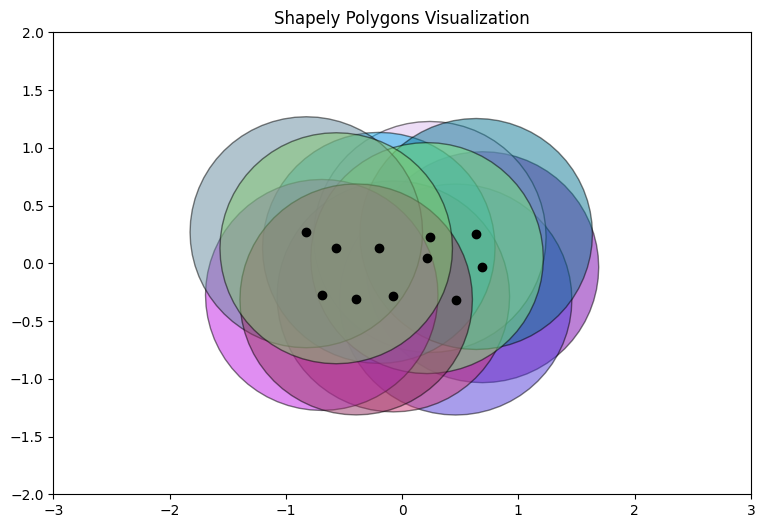

In [6]:
poly_list = [plate.polygon for plate in plates]
centers_list = [plate.center for plate in plates]
visualiseScene(poly_list, centers_list)

In [7]:
x = getIntersectRegions(poly_list)

In [22]:
def ExcludeTableRegion(regions):
    results = []
    for region in regions:
        result = difference(region, Polygon(((-1,-0.5),(-1, 0.5),(1, 0.5),(1,-0.5))))
        if not result.is_empty:
            if type(result) == MultiPolygon:
                for poly in result.geoms:
                    results.append(poly)
            else:
                results.append(result)
        
    return results


In [ ]:
z = ExcludeTableRegion(x)

In [24]:
print(z[49].geoms[0])

AttributeError: 'Polygon' object has no attribute 'geoms'

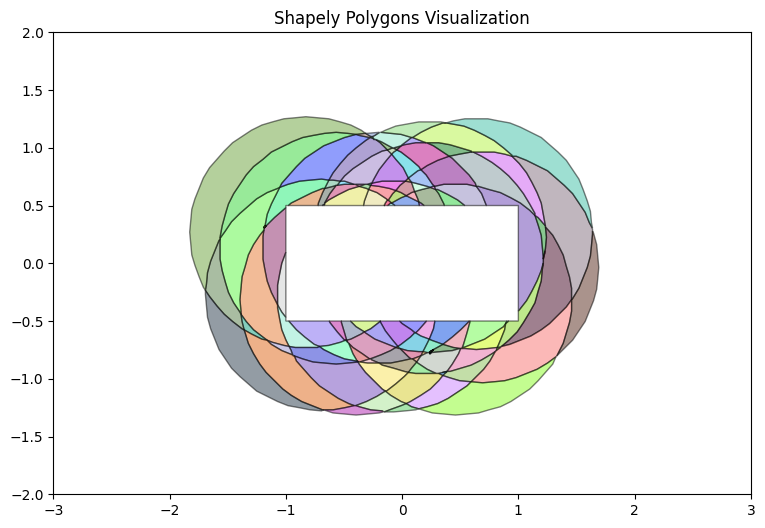

In [25]:
visualiseScene(z)